In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scikitplot.metrics import plot_confusion_matrix

In [2]:
dataset = pd.read_csv("FinalOutput_orden.csv")

In [3]:
dataset

,S.No,BP,AT,PM10,RH,PM2.5,WD,WS,NH3,CO,NO,NO2,NOx,SO2,Ozone,Simulink,Label
0,564,740.000000,17.437083,711.552646,67.176667,519.594167,237.725417,1.108333,148.204583,1.550000,210.351250,95.988750,292.005563,14.662530,12.021250,4.285714,Healthy
1,1454,980.795417,31.779167,88.937500,55.280000,32.875000,90.609583,1.463750,44.985000,0.772299,12.456250,44.293333,33.711250,9.143167,17.640833,4.421459,Healthy
2,115,740.000000,37.692083,532.771567,21.725417,157.167083,206.365000,1.305417,31.337083,1.942500,11.281667,61.652917,70.262917,19.507509,14.038946,4.049023,Healthy
3,2161,972.096250,21.465000,179.125000,76.462917,153.677083,237.656250,0.352083,7.502500,2.066250,18.486667,17.593750,24.432083,19.746899,26.724583,4.390401,Healthy
4,145,740.000000,39.137083,560.061617,24.482917,162.872500,253.540417,3.340833,36.914167,1.146548,155.567500,118.917083,329.332083,10.107500,12.099167,4.285714,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,918,737.635757,24.789489,443.037470,44.005243,192.375085,206.168857,1.069558,80.539796,2.592207,104.938665,109.599813,214.506152,29.056553,34.225155,6.785714,Unhealthy
311,1002,737.635757,24.789489,443.037470,44.005243,192.375085,206.168857,1.069558,80.539796,2.592207,104.938665,109.599813,214.506152,29.056553,34.225155,6.785714,Unhealthy
312,882,737.635757,24.789489,443.037470,44.005243,192.375085,206.168857,1.069558,80.539796,2.592207,104.938665,109.599813,214.506152,29.056553,34.225155,6.785714,Unhealthy
313,989,737.635757,24.789489,443.037470,44.005243,192.375085,206.168857,1.069558,80.539796,2.592207,104.938665,109.599813,214.506152,29.056553,34.225155,6.785714,Unhealthy


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.No      315 non-null    int64  
 1   BP        315 non-null    float64
 2   AT        315 non-null    float64
 3   PM10      315 non-null    float64
 4   RH        315 non-null    float64
 5   PM2.5     315 non-null    float64
 6   WD        315 non-null    float64
 7   WS        315 non-null    float64
 8   NH3       315 non-null    float64
 9   CO        315 non-null    float64
 10  NO        315 non-null    float64
 11  NO2       315 non-null    float64
 12  NOx       315 non-null    float64
 13  SO2       315 non-null    float64
 14  Ozone     315 non-null    float64
 15  Simulink  315 non-null    float64
 16  Label     315 non-null    object 
dtypes: float64(15), int64(1), object(1)
memory usage: 42.0+ KB


In [5]:
dataset=dataset.drop("S.No",axis=1)

In [6]:
dataset

,BP,AT,PM10,RH,PM2.5,WD,WS,NH3,CO,NO,NO2,NOx,SO2,Ozone,Simulink,Label
0,740.000000,17.437083,711.552646,67.176667,519.594167,237.725417,1.108333,148.204583,1.550000,210.351250,95.988750,292.005563,14.662530,12.021250,4.285714,Healthy
1,980.795417,31.779167,88.937500,55.280000,32.875000,90.609583,1.463750,44.985000,0.772299,12.456250,44.293333,33.711250,9.143167,17.640833,4.421459,Healthy
2,740.000000,37.692083,532.771567,21.725417,157.167083,206.365000,1.305417,31.337083,1.942500,11.281667,61.652917,70.262917,19.507509,14.038946,4.049023,Healthy
3,972.096250,21.465000,179.125000,76.462917,153.677083,237.656250,0.352083,7.502500,2.066250,18.486667,17.593750,24.432083,19.746899,26.724583,4.390401,Healthy
4,740.000000,39.137083,560.061617,24.482917,162.872500,253.540417,3.340833,36.914167,1.146548,155.567500,118.917083,329.332083,10.107500,12.099167,4.285714,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,737.635757,24.789489,443.037470,44.005243,192.375085,206.168857,1.069558,80.539796,2.592207,104.938665,109.599813,214.506152,29.056553,34.225155,6.785714,Unhealthy
311,737.635757,24.789489,443.037470,44.005243,192.375085,206.168857,1.069558,80.539796,2.592207,104.938665,109.599813,214.506152,29.056553,34.225155,6.785714,Unhealthy
312,737.635757,24.789489,443.037470,44.005243,192.375085,206.168857,1.069558,80.539796,2.592207,104.938665,109.599813,214.506152,29.056553,34.225155,6.785714,Unhealthy
313,737.635757,24.789489,443.037470,44.005243,192.375085,206.168857,1.069558,80.539796,2.592207,104.938665,109.599813,214.506152,29.056553,34.225155,6.785714,Unhealthy


In [7]:
dataset.groupby(["Label"]).size()

Label
Healthy      105
Moderate     105
Unhealthy    105
dtype: int64

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset["Label"]=label_encoder.fit_transform(dataset["Label"])
dataset["Label"].unique()

In [8]:
# Iterate over all columns and convert intos to int32 and floated to floats 
df = dataset
for col in df.columns: 
    if df[col].dtype == "int64":
        df[col] = df[col].astype('int32')
    elif df[col].dtype == "float64":
        df[col] = df[col].astype("float32")

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BP        315 non-null    float32
 1   AT        315 non-null    float32
 2   PM10      315 non-null    float32
 3   RH        315 non-null    float32
 4   PM2.5     315 non-null    float32
 5   WD        315 non-null    float32
 6   WS        315 non-null    float32
 7   NH3       315 non-null    float32
 8   CO        315 non-null    float32
 9   NO        315 non-null    float32
 10  NO2       315 non-null    float32
 11  NOx       315 non-null    float32
 12  SO2       315 non-null    float32
 13  Ozone     315 non-null    float32
 14  Simulink  315 non-null    float32
 15  Label     315 non-null    object 
dtypes: float32(15), object(1)
memory usage: 21.0+ KB


In [10]:
dataset=df

In [11]:
indep = dataset[["BP", "AT","PM10","AT", "RH", "PM2.5", "WD", "WS", "NH3", "CO", "NO", "NO2", "NOx", "SO2", "Ozone", "Simulink"]];
dep = dataset[["Label"]];

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion':['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'n_estimators':[10,100]} 
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1') 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\vijai\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\vijai\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             scoring='f1', verbose=3)

In [16]:
re=grid.cv_results_
grid_predictions = grid.predict(X_test) 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions) 
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, grid_predictions)

In [17]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

The f1_macro value for best parameter {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}: 1.0


In [18]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[22  0  0]
 [ 0 20  0]
 [ 0  0 21]]


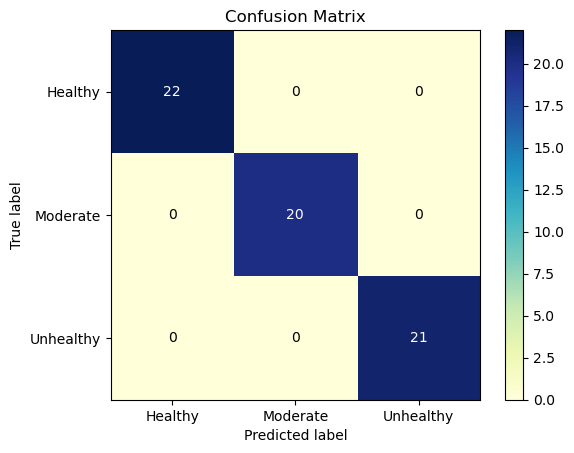

In [19]:
plot_confusion_matrix(y_test, grid_predictions, cmap="YlGnBu")
plt.show()

In [20]:
print("The report:\n",clf_report)

The report:
               precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00        22
    Moderate       1.00      1.00      1.00        20
   Unhealthy       1.00      1.00      1.00        21

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [21]:
table=pd.DataFrame.from_dict(re)

In [22]:
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054407,0.003201,0.012799,0.003919,gini,auto,10,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.316836,0.011975,0.030403,0.003200,gini,auto,100,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,0.040003,0.007156,0.006402,0.003201,gini,sqrt,10,"{'criterion': 'gini', 'max_features': 'sqrt', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,0.297632,0.019201,0.032005,0.000002,gini,sqrt,100,"{'criterion': 'gini', 'max_features': 'sqrt', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,0.038404,0.003201,0.008001,0.000002,gini,log2,10,"{'criterion': 'gini', 'max_features': 'log2', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,0.363241,0.030192,0.052805,0.014841,gini,log2,100,"{'criterion': 'gini', 'max_features': 'log2', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
6,0.062406,0.009330,0.011202,0.003919,entropy,auto,10,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,0.731357,0.053680,0.176022,0.152130,entropy,auto,100,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,0.076264,0.020317,0.033865,0.030585,entropy,sqrt,10,"{'criterion': 'entropy', 'max_features': 'sqrt...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.652663,0.105685,0.070341,0.032390,entropy,sqrt,100,"{'criterion': 'entropy', 'max_features': 'sqrt...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
